# Exploratory Data Analysis (EDA)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from seaborn import lmplot

In [7]:
wine_quality = pd.read_csv("/content/winequality-red (1).csv", sep = ",")

wine_quality["string1"] = np.random.choice(list('ABCD'), size=(wine_quality.shape[0]))
wine_quality["string2"] = np.random.choice(list('ABCD'), size=(wine_quality.shape[0]))

In [8]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,string1,string2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B,C
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,C,A
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,D,C
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,C,B
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,D,A


In [9]:
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,string1,string2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,C,B
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,C,B
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,A,C
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,C,A
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,A,A


In [10]:
wine_quality.shape

(1599, 14)

In [11]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'string1', 'string2'],
      dtype='object')

Provavelmente, se não formos conhecedores de vinhos, essas variáveis ​​fazem pouco sentido para nós. Lembremos que o ideal é que tenhamos conhecimento do tema em que vamos trabalhar (obviamente também podemos contar com um especialista para nos orientar 😉).

Para mais informações sobre o significado de cada variável, podemos acessar os seguintes links:
* https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
* https://waterhouse.ucdavis.edu/whats-in-wine
* https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* https://www.mt.com/gb/en/home/supportive_content/ana_chem_applications/titration/AP015.html

In [12]:
#Tipo de dados para cada columna
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
string1                  object
string2                  object
dtype: object

In [13]:
type(wine_quality)

pandas.core.frame.DataFrame

**Completude de dados**:
Antes de iniciar qualquer análise, é bom revisar os dados em busca de informações ausentes; e se houver, decida o que podemos fazer com esses registros ausentes. Com os dataframes do pandas, podemos usar a função info() para encontrar os dados ausentes.

In [14]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  string1               1599 non-null   object 
 13  string2               1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 175.0+ KB


# Estatísticas descritivas

In [15]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Categóricas

In [16]:
wine_quality.describe(include = [object])

,string1,string2
count,1599,1599
unique,4,4
top,D,A
freq,423,436


# Medidas repetidas

In [17]:
((wine_quality == 0).sum(axis=0)/wine_quality.shape[0])*100

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             8.255159
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.000000
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
string1                 0.000000
string2                 0.000000
dtype: float64

# Visualização Gráfica

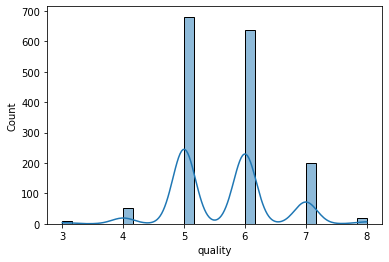

In [18]:
sns.histplot(wine_quality["quality"], kde = True)

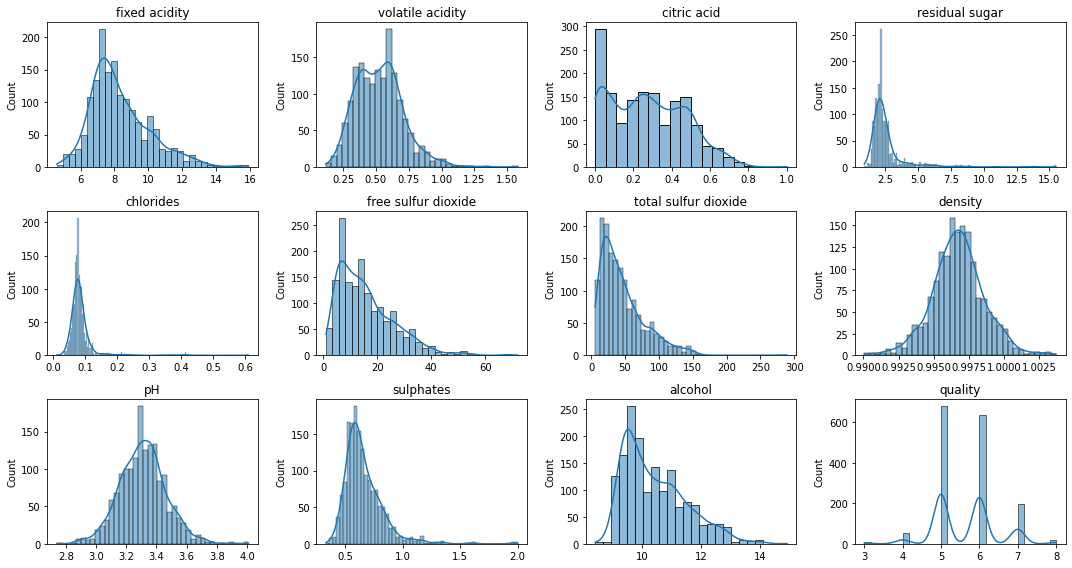

In [19]:
#Podemos usar um pouco de código para exibir mais de uma variável por vez

variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']

columns = 4
rows    = 3
fig, axes = plt.subplots(rows, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(wine_quality[variable], ax = axes[i][j], kde = True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

%	Modulus	x % y	Na computação, a operação de módulo retorna o resto ou resto com sinal de uma divisão, após um número ser dividido por outro

//	Floor division	x // y Em matemática, a função Floor converte um número real x no maior número inteiro menor ou igual a x

In [20]:
for current_idx, variable in enumerate(variables):
   i = current_idx // columns
   j = current_idx % columns
   print(current_idx, columns, " //:", i, "%:", j)

0 4  //: 0 %: 0
1 4  //: 0 %: 1
2 4  //: 0 %: 2
3 4  //: 0 %: 3
4 4  //: 1 %: 0
5 4  //: 1 %: 1
6 4  //: 1 %: 2
7 4  //: 1 %: 3
8 4  //: 2 %: 0
9 4  //: 2 %: 1
10 4  //: 2 %: 2
11 4  //: 2 %: 3


In [24]:
1%4

1

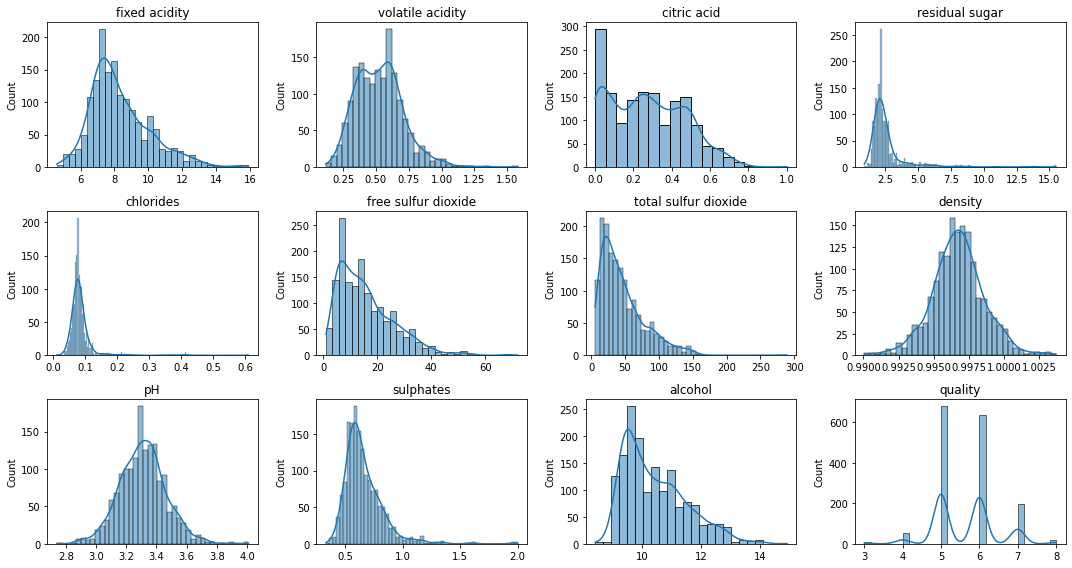

In [25]:
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']

columns = 4
rows    = 3
fig, axes = plt.subplots(rows, columns, figsize=(15,8))

k = 0
for i in range(0,rows):
  for j in range(0,columns):
    sns.histplot(wine_quality[variables[k]], ax = axes[i][j], kde = True)
    axes[i][j].set_title(variables[k])
    axes[i][j].set_xlabel("")
    k+=1   
plt.tight_layout()

A partir deste gráfico podemos identificar vários aspectos, como, por exemplo, que muitas das variáveis ​​possuem uma distribuição assimétrica (acidez fixa, açúcar residual, cloretos, por exemplo), além do fato de alguns valores parecerem ter valores extremos (açúcar residual, sulfatos, dióxido de enxofre total).

# Boxplots
Como sabemos, os boxplots nos permitem analisar e ver muito rapidamente quais variáveis ​​possuem valores extremos.

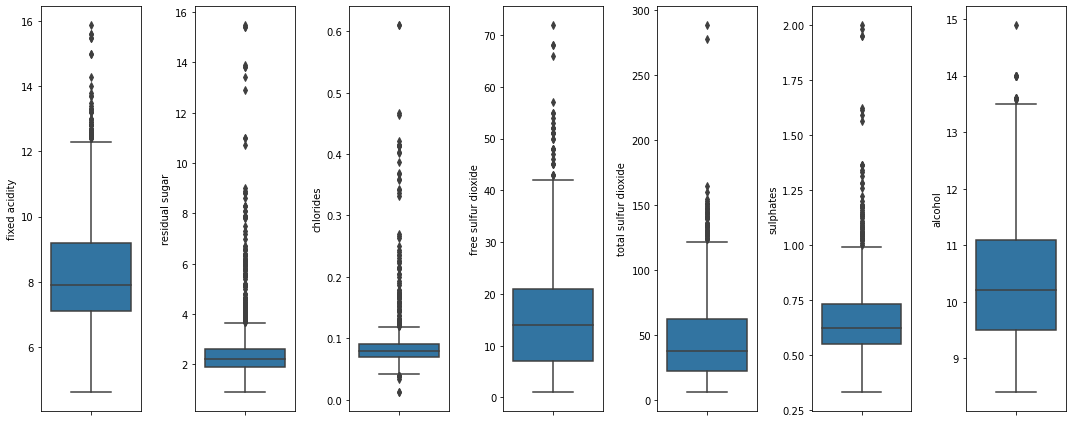

In [26]:
variables = ['fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide','sulphates', 'alcohol']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=wine_quality, ax = ax)
plt.tight_layout()

In [ ]:
list(zip(axes, variables))

# Scatterplots
Agora vamos tentar identificar de forma rápida e visual a correlação entre as variáveis!

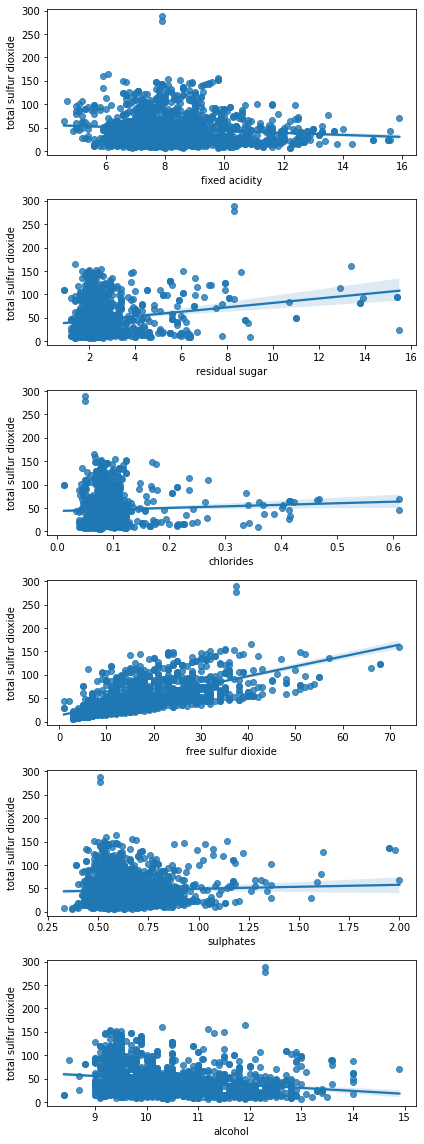

In [27]:
variables = ['fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 
             'sulphates', 'alcohol']

fig, axes = plt.subplots(6,1, figsize=(6,16), sharey = True)

for ax, variable in zip(axes, variables):
  sns.regplot(x = wine_quality[variable], y = wine_quality["total sulfur dioxide"], ax = ax)
plt.tight_layout()

# Selecionando apenas as colunas por tipo

In [28]:
wine_quality.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,string1,string2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B,C
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,C,A
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,D,C
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,C,B
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,D,A


In [29]:
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
string1                  object
string2                  object
dtype: object

In [30]:
wine_quality_num = wine_quality.select_dtypes(include = np.dtype(float))
wine_quality_num.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [31]:
wine_quality_num = wine_quality.select_dtypes(include = np.number)
wine_quality_num.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
wine_quality_str = wine_quality.select_dtypes(include = np.dtype(object))
wine_quality_str.head(5)

,string1,string2
0,B,C
1,C,A
2,D,C
3,C,B
4,D,A


No gráfico anterior, você pode ver uma relação clara entre as variáveis ​​analisadas. Também podemos
faça uso da Matriz de Correlação se quisermos ver, por exemplo, o coeficiente de **Pearson**

In [33]:
correlation = wine_quality_num.corr(method = "pearson")
correlation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


In [34]:
mask = np.triu(np.ones_like(correlation))

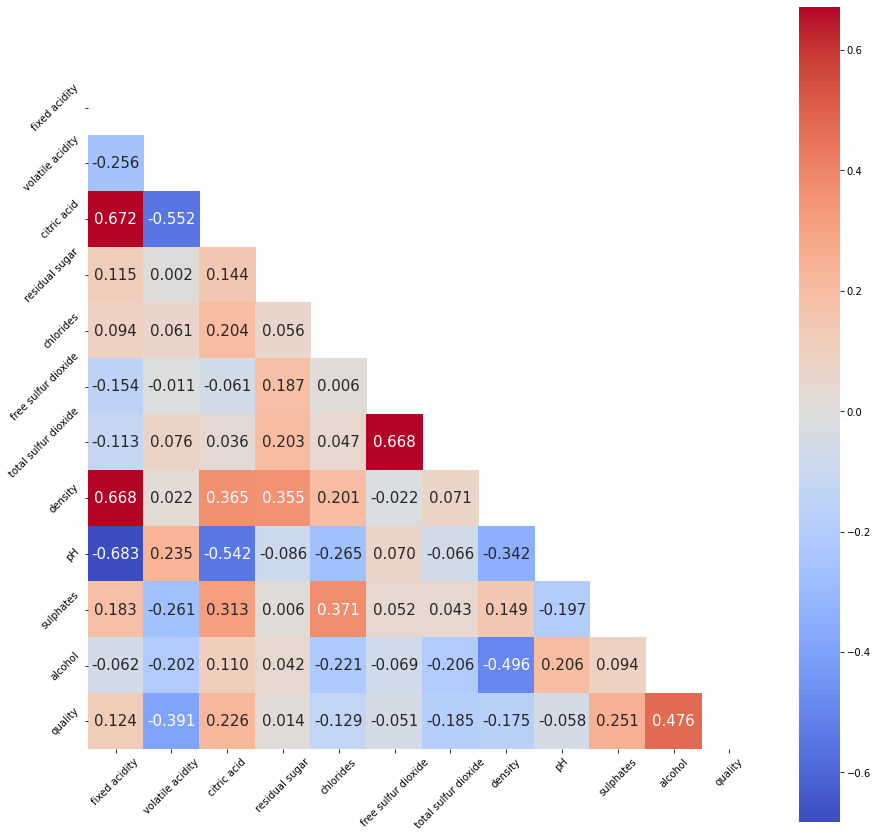

In [41]:
plt.figure(figsize=(15,15))

sns.heatmap(correlation, 
            mask = mask,
            cbar = True, 
            square = True, 
            annot = True,
            fmt = ".3f",
            annot_kws = {"size": 15},
            cmap= "coolwarm") # viridis

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

No gráfico anterior, você pode ver uma relação clara entre as variáveis ​​analisadas. Também podemos
faça uso da Matriz de Correlação se quisermos ver, por exemplo, o coeficiente de **Pearson**

https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

# Relatório de dados

In [ ]:
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [4]:
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd

In [5]:
lista = [np.random.rand(100, 1),
         pd.util.testing.rands_array(3, 100),
         np.random.choice(list("ABC"),size=(100))]

/usr/local/lib/python3.7/dist-packages/pandas/util/__init__.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


In [44]:
A = np.random.randn(100)

In [6]:
array_nan = np.random.randn(100)
array_nan.ravel()[np.random.choice(array_nan.size, 20, replace=False)] = np.nan

array_0 = np.random.randn(100)
array_0.ravel()[np.random.choice(array_0.size, 70, replace=False)] = 0

df = pd.DataFrame({"str1": np.random.choice(list('ABCD'), size=(100)),
                   "str2": np.random.choice(list('ABCD'), size=(100)),
                   "str3": pd.util.testing.rands_array(3, 100),
                   "num1": np.random.choice([0,1], size=(100)),
                   "num2": np.random.gamma(2, 2, 100),
                   "num3": array_nan,
                   "num4": array_0
})

df = pd.concat([df, df.sample(5)])
df

,str1,str2,str3,num1,num2,num3,num4
0,B,A,Zzl,0,4.999547,0.758532,0.164085
1,D,C,BdF,0,1.093806,NaN,0.842873
2,B,B,e3I,1,2.963669,-0.536200,0.316405
3,C,A,5Xr,1,3.204371,-0.876420,0.000000
4,D,A,Vl9,1,1.959862,-0.779695,0.000000
...,...,...,...,...,...,...,...
16,B,C,Yu6,0,1.709858,NaN,0.425155
18,A,B,Wqn,1,5.477156,0.500920,-0.862163
61,D,D,KUX,0,4.219300,-1.955869,0.000000
51,B,D,GiV,1,8.013339,-0.776387,-0.432949


In [7]:
relatorio = ProfileReport(df)

In [47]:
relatorio.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:426: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [8]:
relatorio.to_file("relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]